In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
Res = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_21/test_', m_set='J1226_A', w_set='J1226'
    )

  analysing data from ../retrieval_outputs/fiducial_J_B_ret_21/test_.txt


In [3]:
'''
Res = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_11/test_')
_Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_7/test_')

print()
#print(Res.compare_evidence(_Res.ln_Z))
Res.compare_evidence(_Res.ln_Z)

del _Res
'''

"\nRes = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_11/test_')\n_Res = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_7/test_')\n\nprint()\n#print(Res.compare_evidence(_Res.ln_Z))\nRes.compare_evidence(_Res.ln_Z)\n\ndel _Res\n"

In [4]:
'''
_, flux_total, _ = Res.get_model_spec(
    is_local=False, # Rotationally broadened
    )

_, flux_empty, _ = Res.get_model_spec(
    is_local=False, # Rotationally broadened
    line_species_to_include=''
    )
'''

"\n_, flux_total, _ = Res.get_model_spec(\n    is_local=False, # Rotationally broadened\n    )\n\n_, flux_empty, _ = Res.get_model_spec(\n    is_local=False, # Rotationally broadened\n    line_species_to_include=''\n    )\n"

Mg


100%|██████████| 1001/1001 [00:09<00:00, 107.43it/s]


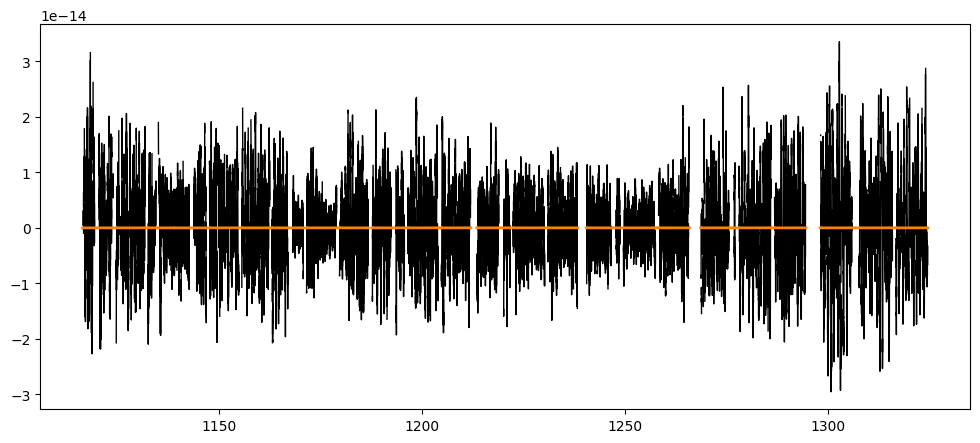

In [5]:
CCF_species = {
    #'complete': None, # Include all species in template
    #'H2O': 'H2O_pokazatel_main_iso', 
    #'CO': 'CO_main_iso', 
    #'CH4': 'CH4_hargreaves_main_iso', 
    #'NH3': 'NH3_coles_main_iso', 
    #'Fe': 'Fe',
    #'FeH': 'FeH_main_iso',
    #'TiO': 'TiO_48_Exomol_McKemmish',
    #'K': 'K',
    'Mg': 'Mg',
    }

for key_j, line_species_j in CCF_species.items():

    print(f'{key_j}')
        
    # Template spectrum of one species
    wave_local, flux_local, _ = Res.get_model_spec(
        #is_local=True, # Not rotationally broadened
        is_local=False, # Not rotationally broadened
        line_species_to_include=line_species_j
        )
    
    # Template spectrum w/o that species
    _, flux_wo_species, _ = Res.get_model_spec(
        is_local=False, # Rotationally broadened
        line_species_to_exclude=line_species_j
        )
    
    #flux_local = [
    #    flux_local[i] - flux_empty[i] for i in range(len(flux_empty))
    #    ]
    #flux_local = [
    #    flux_total[i] - flux_wo_species[i] for i in range(len(flux_total))
    #    ]
    
    # Compute cross-correlation
    rv, _, CCF_SNR = Res.get_CCF(
        wave_local, flux_local, # Model template
        flux_global=None, 
        #rv=np.arange(-1000,1000+1e-6,1), 
        rv=np.arange(-1000,1000+1e-6,2), 
        model_to_subtract_from_d_res=flux_wo_species, 
        subtract_global=False, 
        on_d_res=False, # Don't run on data residuals
        high_pass={
            'm_res': utils.high_pass_filter(window_length=301), # Filter on model
            'd_res': utils.high_pass_filter(window_length=301), # Filter on data
            }, 
        plot=True, 
        rv_sep=300, # Separation to calculate std-dev from
        )
    CCF_species[key_j] = CCF_SNR

    del wave_local, flux_local, flux_wo_species

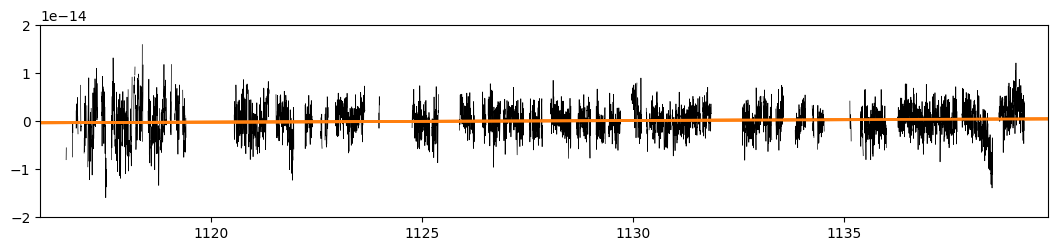

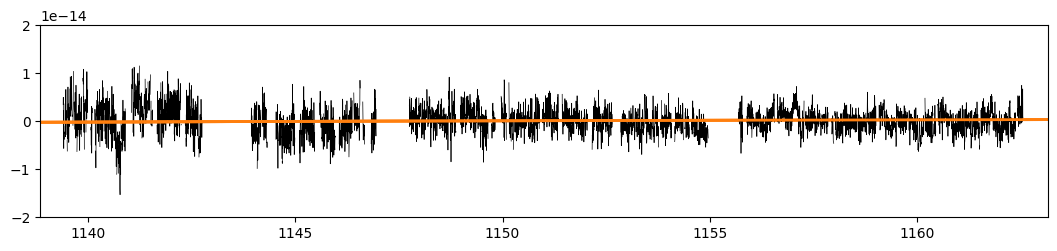

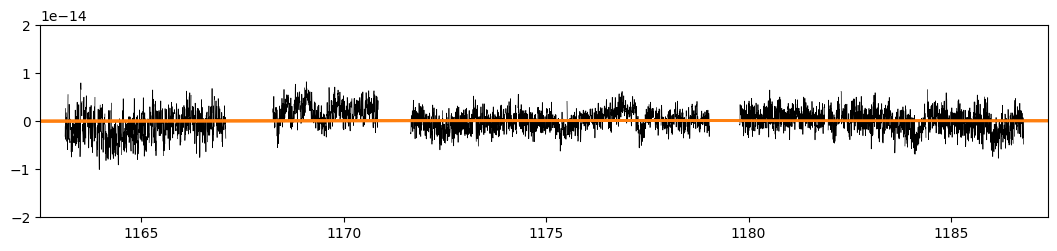

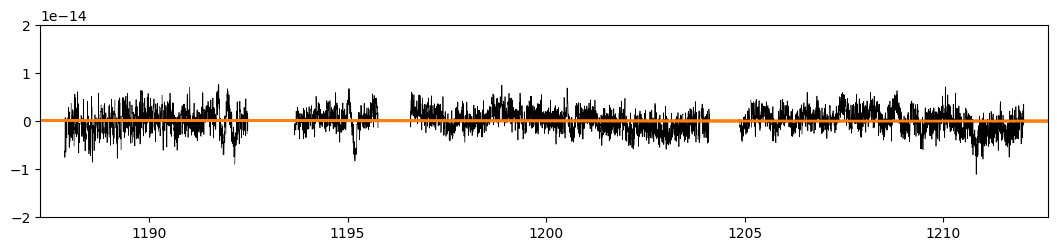

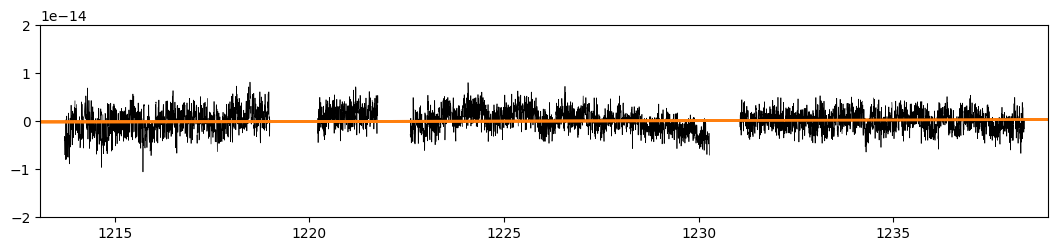

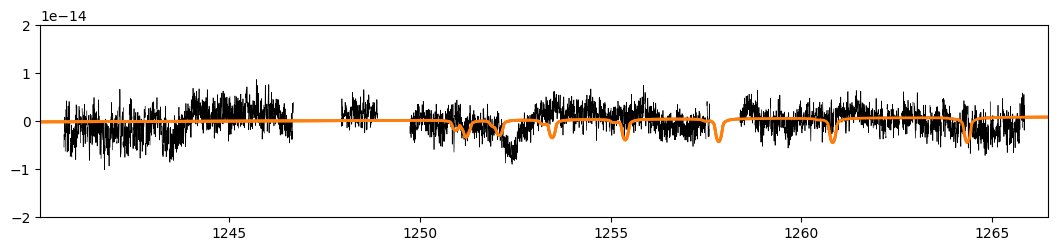

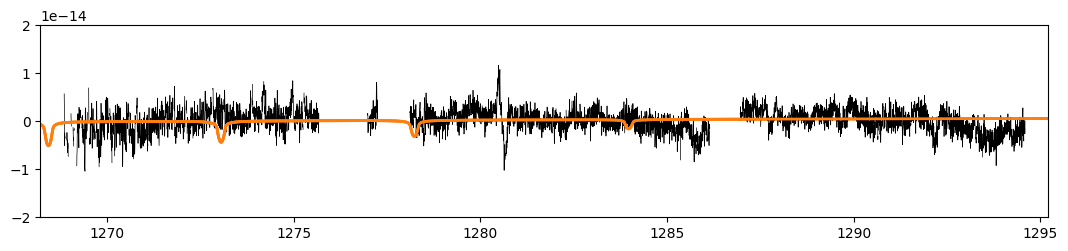

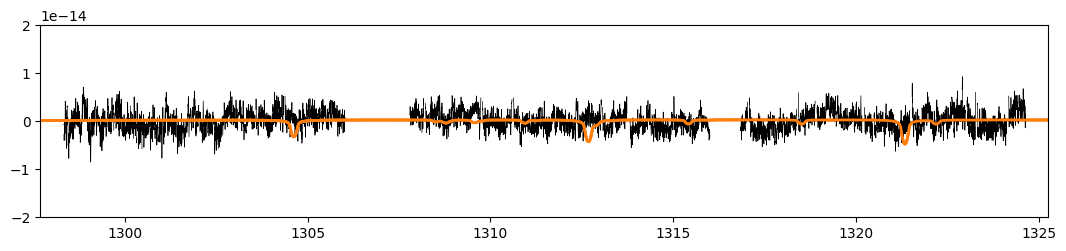

In [3]:
# Template spectrum of one species
wave_local, flux_local, _ = Res.get_model_spec(
    #is_local=True, # Not rotationally broadened
    is_local=False, # Rotationally broadened
    line_species_to_include='HF_main_iso'
    )

# Template spectrum w/o that species
_, flux_wo_species, _ = Res.get_model_spec(
    is_local=False, # Rotationally broadened
    line_species_to_exclude='HF_main_iso'
    )

_, flux_total, _ = Res.get_model_spec(
    is_local=False, # Rotationally broadened
    )

Res.d_spec = Res._load_object('d_spec', bestfit_prefix=False)
Res._load_objects_as_attr(['LogLike'])

for i in range(Res.d_spec.n_orders):

    plt.figure(figsize=(13,2.5))

    for j in range(Res.d_spec.n_dets):
        flux_wo_species_ij = np.interp(
            Res.d_spec.wave[i,j], xp=wave_local[i], fp=flux_wo_species[i]
            )
        flux_wo_species_ij *= Res.LogLike.phi[i,j,0]

        flux_total_ij = np.interp(
            Res.d_spec.wave[i,j], xp=wave_local[i], fp=flux_total[i]
            )
        flux_total_ij *= Res.LogLike.phi[i,j,0]

        plt.plot(
            Res.d_spec.wave[i,j], Res.d_spec.flux[i,j]-flux_total_ij, c='k', lw=0.5
            )
        #plt.plot(
        #    Res.d_spec.wave[i,j], Res.d_spec.flux[i,j]-flux_wo_species_ij, c='0.5', lw=1
        #    )
        #plt.plot(
        #    wave_local[i], utils.high_pass_filter(window_length=2001)(flux_local[i]), c='C1', lw=1
        #    )
        plt.plot(
            wave_local[i], (flux_local[i]-flux_local[i].mean())*0.1, c='C1', lw=2
            )
        #plt.plot(
        #    wave_local[i], (flux_total[i]-flux_wo_species[i])*1000, c='C1', lw=2
        #    )
    
    plt.xlim(Res.d_spec.wave[i].min()-0.5, Res.d_spec.wave[i].max()+0.5)
    plt.ylim(-2e-14,2e-14)
    #plt.plot(wave_local[i], flux_local[i], c='C1')
    plt.show()

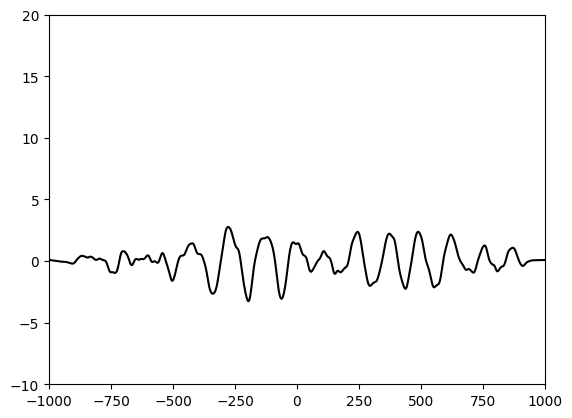

In [7]:
xlim = (-1000,1000)
ylim = (-10,20)

plt.plot(rv, CCF_species['Mg'], c='k')
plt.xlim(*xlim); plt.ylim(*ylim)
plt.show()

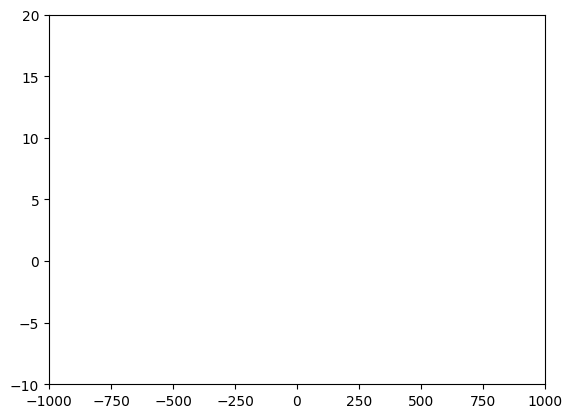

In [6]:
xlim = (-1000,1000)
ylim = (-10,20)

#plt.plot(rv, CCF_species['complete'], c='k')
plt.plot(rv, CCF_species['CH4'], c='C4')
plt.xlim(*xlim); plt.ylim(*ylim)
plt.show()

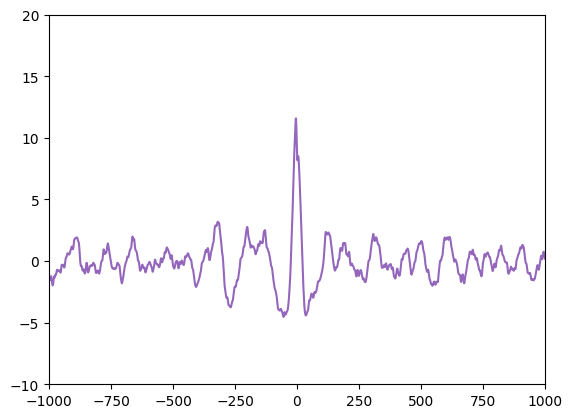

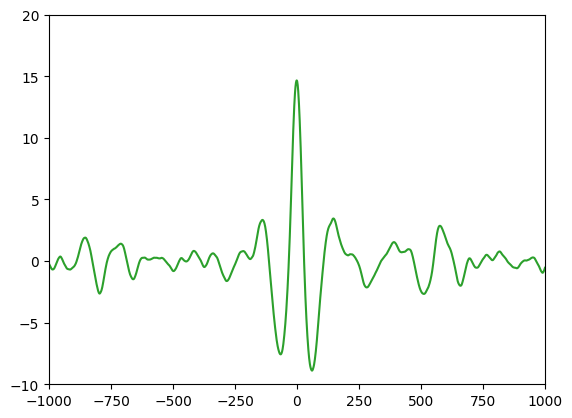

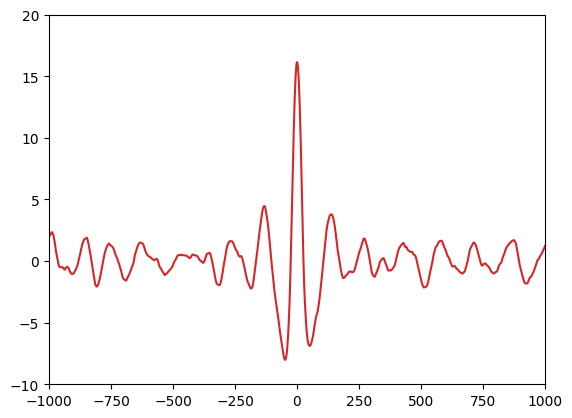

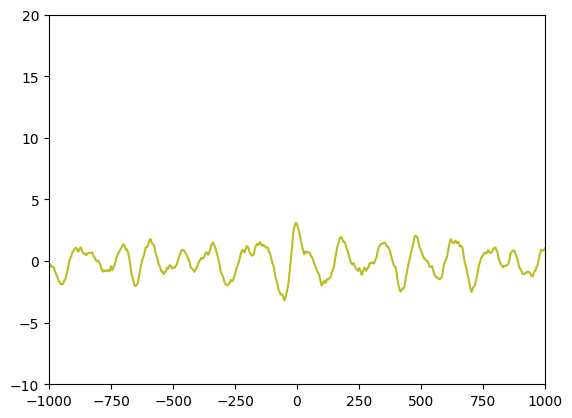

In [ ]:
xlim = (-1000,1000)
ylim = (-10,20)

#plt.plot(rv, CCF_species['complete'], c='k')
plt.plot(rv, CCF_species['CH4'], c='C4')
plt.xlim(*xlim); plt.ylim(*ylim)
plt.show()

plt.plot(rv, CCF_species['CO'], c='C2')
plt.xlim(*xlim); plt.ylim(*ylim)
plt.show()

plt.plot(rv, CCF_species['H2O'], c='C3')
plt.xlim(*xlim); plt.ylim(*ylim)
plt.show()

plt.plot(rv, CCF_species['NH3'], c='C8')
plt.xlim(*xlim); plt.ylim(*ylim)
plt.show()